In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

root_dir = '//LEMA-1/LEMA Shared Folder/Matan/COVID-Cellcom/Data/'

In [9]:
home = pd.read_csv(root_dir + 'Summary/TAZ/Summary_Home_0_TAZ.txt', delimiter='\t', encoding='utf-16')
# home = pd.read_csv('Summary_Home_0_City.txt', delimiter='\t', encoding='utf-16')
home.columns = ['day', 'city', 'stay', 'out']
home['day'] = pd.to_datetime(home.day, dayfirst=True)
home['stay'] = home.stay.apply(lambda x: x.replace(',','')).astype(int)
home['out'] = home.out.apply(lambda x: x.replace(',','')).astype(int)
home['total'] = home.stay + home.out
home['out_pct'] = home.out / home.total
# home['city_parsed'] = home.city.apply(lambda x: x[:-7] if ('חרדים' in x or 'ערבים' in x) else x)
home.head()

,day,city,stay,out,total,out_pct
0,2020-02-01,1,2249,1742,3991,0.436482
1,2020-02-01,5,1226,646,1872,0.345085
2,2020-02-01,6,789,365,1154,0.316291
3,2020-02-01,8,2780,1869,4649,0.402022
4,2020-02-01,9,4032,2788,6820,0.408798


In [10]:
home.day.max().date()

datetime.date(2020, 4, 12)

In [4]:
taz_details = pd.read_csv(root_dir + 'TAZ/TAZ2city.csv').set_index('taz')
taz_details.head()

,city,neighbourhood,use,county,district,popuation_cellcom,population_lamas,area
taz,,,,,,,,
1,שעלבים נוף איילון,NaN,מגורים,43,4,1911.0,4009,852978
2,תל אביב -יפו,ספורטק,פנאי ונופש,51,5,2008.0,0,1475818
3,תל אביב -יפו,תחנת כח רידינג,מתקן הנדסה,51,5,286.0,0,346241
4,תל אביב -יפו,שדה דב,מיועד למגורים,51,5,1751.0,0,499512
5,תל אביב -יפו,גלילות,מגורים,51,5,693.0,1178,508601


In [5]:
south_arab_cities = [2561, 2545, 2548, 2549, 2550, 2551, 2553, 2556, 2558, 2552, 2445, 2450, 2562, 2563, 2567, 
                     2557, 2559, 2560, 2626, 2627, 2628]
taz_details.loc[south_arab_cities, 'county'] = '62_arab'
taz_details.loc[taz_details.city == 'תל אביב -יפו', 'county'] = '51_tlv'
taz_details.loc[taz_details.city == 'בני ברק', 'county'] = '51_bb'
taz_details.loc[taz_details.city == 'בית שמש', 'county'] = '11_betshemesh'

In [6]:
def get_mode(grouped):
    return grouped.value_counts().idxmax()

city2county = taz_details.groupby('city').county.apply(get_mode).to_dict()

In [7]:
home['county'] = home.city_parsed.apply(lambda x: city2county.get(x, None))
print('cities w/o county:', home[home.county.isnull()].city_parsed.unique())

cities w/o county: ['אבו קורינאת' 'אדמית עראמשה' 'אל -עריאן'
 'אשבול קלחים בית הגדי יושיביה מבועים ניר משה ניר עקיבא שדה צבי תלמי בילו פעמי תש"ז זרועה"'
 'בועיינה-נוגידאת' 'ביר הדאג' 'בית גן'
 'בית העמק שייח דנון עמקה נתיב השיירה כליל אשרת'
 'בלפוריה תל עדשים מזרע כפר גדעון' 'בנימינה-גבעת עדה' 'גדיידה-מכר'
 'גולס טל-אל' 'גיתה יאנוח-גת' 'גלגוליה' 'גסר א-זרקא' 'גש (גוש חלב)'
 'כאוכב אבו אל-היגא יודפת שכניה מנוף מורשת קורנית'
 'כנרת (קבוצה) דגניה א כנרת (מושבה) דגניה ב' 'כעביה-טבאש-חגאגרה'
 'כפר חסידים א כפר חסידים ב כפר הנוער הדתי'
 'כפר עציון מגדל עוז ראש צורים אלון שבות בת עין'
 'כרם מהר"ל צרופה הבונים עופר' 'מגד אל-כרום' 'מגדל שמס נווה אטיב' 'מולדה'
 'מטולה כפר גלעדי' 'מכחול דריגאת כחלה' 'מעגל מיכאל' 'מצפה אבי"ב'
 'נילי נעלה"' 'ניצן ניצנים ניר ישראל באר גנים ניצן ב'
 'נתיב הגדוד תומר יפית משואה גלגל ייטב פצאל נירן נעמ"ה"'
 'נתיב הלה אביעזר נווה מיכאל אדרת"' 'סאגור שזור'
 'סואעד (חמרייה)* ראס עלי עדי הרדוף חואלד' 'סחנין' 'עגר'
 'עין גב מעגן האון תל קציר' 'עין כרם-ביס חקלאי"'
 'שחר ניר 

In [8]:
home_county = home.dropna().groupby(['day', 'county'])[['stay', 'out', 'total']].sum().reset_index()
home_county['out_pct'] = home_county.out / home_county.total
home_county

,day,county,stay,out,total,out_pct
0,2020-02-01,11,652845,335066,987911,0.339166
1,2020-02-01,21,66321,29092,95413,0.304906
2,2020-02-01,22,56638,41426,98064,0.422438
3,2020-02-01,23,292502,228244,520746,0.438302
4,2020-02-01,24,280298,236395,516693,0.457515
...,...,...,...,...,...,...
1435,2020-04-12,71,693180,364145,1057325,0.344402
1436,2020-04-12,11_betshemesh,40070,12746,52816,0.241328
1437,2020-04-12,51_bb,111246,9292,120538,0.077088
1438,2020-04-12,51_tlv,362337,82647,444984,0.185730


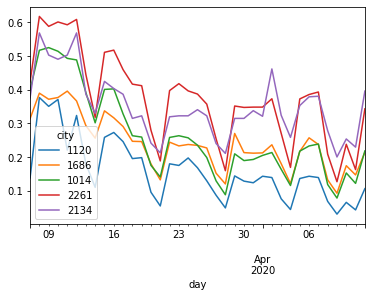

In [12]:
pivoted = pd.pivot_table(home_county, index='day', columns='county', values='out_pct')
# pivoted[pivoted.index >= '2020-03-07'][[51,'51_tlv','51_bb','62_arab',11,'11_betshemesh']].plot()
pivoted[pivoted.index >= '2020-03-07'][np.random.choice(pivoted.columns, 5)].plot()

In [13]:
def robust_max(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[-n:])

def robust_min(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[:n])

global_max = pivoted.apply(robust_max)
global_min = pivoted.apply(robust_min)
# global_min, global_max = 0,1
span = global_max - global_min
relative_rate = pivoted.apply(lambda row: (row - global_min) / span, axis=1)

In [14]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def avg_by_dates(df, from_date, to_date, weights=None):
    filtered = df[(df.index >= from_date) & (df.index <= to_date)]
    if weights is None:
        return filtered.describe().T[['mean','std','min','max']]
    
    weights = pd.Series(weights)
    stats = filtered.describe().T[['min','max']]
    stats['mean'] = filtered.apply(lambda col: np.average(col, weights=weights))
    stats['std'] = filtered.apply(lambda col: weighted_std(col, weights=weights))
    return stats

In [15]:
result = dict()
result['routine'] = avg_by_dates(relative_rate, '2020-02-02', '2020-02-29')
result['no_school'] = avg_by_dates(relative_rate, '2020-03-14', '2020-03-16', 
                         weights={'2020-03-14': 2/7, '2020-03-15': 2.5/7, '2020-03-16': 2.5/7})
result['no_work'] = avg_by_dates(relative_rate, '2020-03-17', '2020-03-25', 
                       weights={i:1/14 if i.day in [17,18,24,25] else 1/7
                                  for i in pd.date_range('2020-03-17', '2020-03-25')})
result['hundred_meters'] = avg_by_dates(relative_rate, '2020-03-26', '2020-04-02', 
                              weights={i:1/14 if i.day in [26,2] else 1/7
                                       for i in pd.date_range('2020-03-26', '2020-04-02')})
result['seger_bb'] = avg_by_dates(relative_rate, '2020-04-03', '2020-04-06', 
                         weights={i:5/14 if i.day in [5,6] else 1/7
                                  for i in pd.date_range('2020-04-03', '2020-04-06')})

In [17]:
import pickle

with open('taz_home_stay_by_periods.pickle', 'wb') as f:
    pickle.dump(result, f)